In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bs4 import BeautifulSoup as soup # HTML parser
import requests # Page requests
import re # Regular expressions
import time # Time delays
import random # Random numbers



header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'} 

# List of guitar brands to check in the title (all in lowercase)
brands = ['yamaha', 'taylor','taylor guitar', 'ibanez', 'fender', 'martin', 'gibson', 'epiphone', 'breedlove', 'godin', 'seagull']

data = []#this is saving the listings into an my object 'data'


for page_num in range(10):  #going through 10 pages of listings to have more data, had some help from chatgpt
    url = f'https://charlottesville.craigslist.org/search/msa?query=guitar#search=1~gallery~0~0={page_num * 120}'
    
    raw = requests.get(url, headers=header)
    
    bsObj = soup(raw.content, 'html.parser')

    listings = bsObj.find_all(class_="cl-static-search-result")

    for k in range(len(listings)):
        title = listings[k].find('div', class_='title').get_text().lower()  # here is revieving the title and making it lower case
        price = listings[k].find('div', class_='price').get_text()  # retrieving the price
        link = listings[k].find(href=True)['href']  # retrieving the link
        
        words = title.split()
        hits = [word for word in words if word in brands]  # this finds the brands  in the title s
        brand = hits[0] if hits else 'missing'  # If no brand is found, set it as 'missing'
        
        data.append({'title': title, 'price': price, 'link': link, 'brand': brand, 'type': guitar_type}) #putting all my data together



         # Determine the type of guitar (acoustic or electric)
        if 'acoustic' in title:
            guitar_type = 'acoustic'
        elif 'electric' in title:
            guitar_type = 'electric'
        else:
            guitar_type = 'unknown'

df = pd.DataFrame.from_dict(data) #putting the data into a dataframe

df['price'] = df['price'].str.replace('$', '').str.replace(',', '') #taking out the characters in the price so that we can view it as a float
df['price'] = pd.to_numeric(df['price'], errors='coerce') #turning the price string to be numeric

print(df.shape)
df.head()

df.to_csv('craigslist_guitars.csv', index=False)



(460, 5)


In [30]:
print(df["brand"].unique())


['gibson' 'yamaha' 'missing' 'fender' 'martin' 'epiphone']


count     460.000000
mean      319.826087
std       378.784624
min         0.000000
25%        30.000000
50%       160.000000
75%       475.000000
max      1695.000000
Name: price, dtype: float64


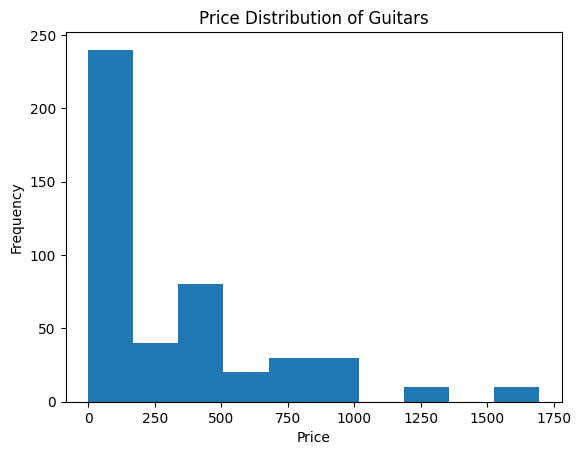

In [37]:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.title('Price Distribution of Guitars')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



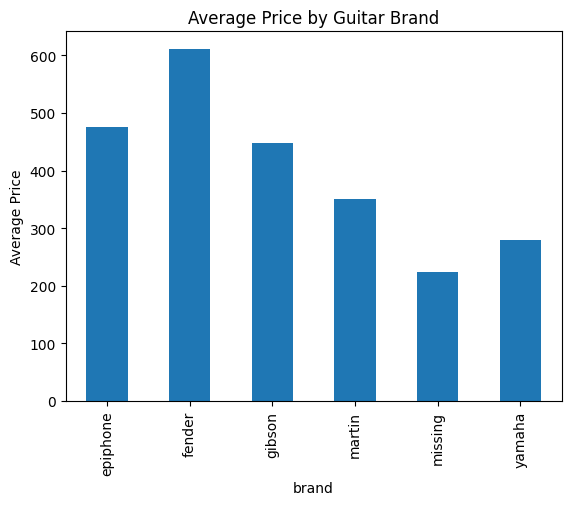

In [38]:
df.loc[:, ['price', 'brand']].groupby('brand').describe() #here i am setting the price by brand

# Price vs. brand (Bar chart)
df.groupby('brand')['price'].mean().plot(kind='bar')
plt.title('Average Price by Guitar Brand')
plt.ylabel('Average Price')
plt.show()



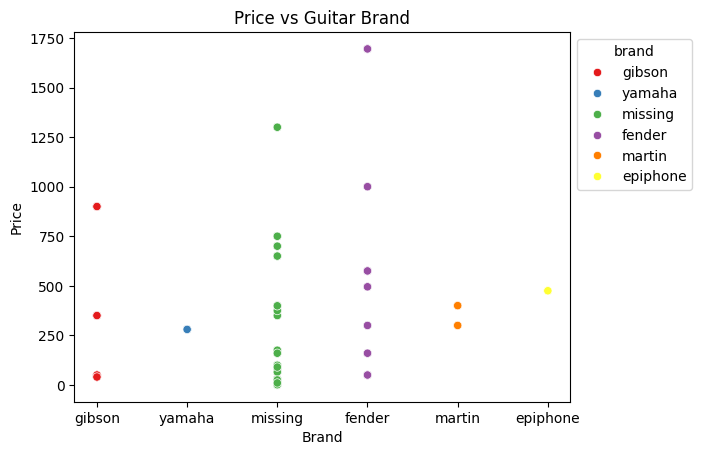

In [33]:
ax = sns.scatterplot(data=df, x='brand', y='price', hue='brand', palette='Set1')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Price vs Guitar Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()


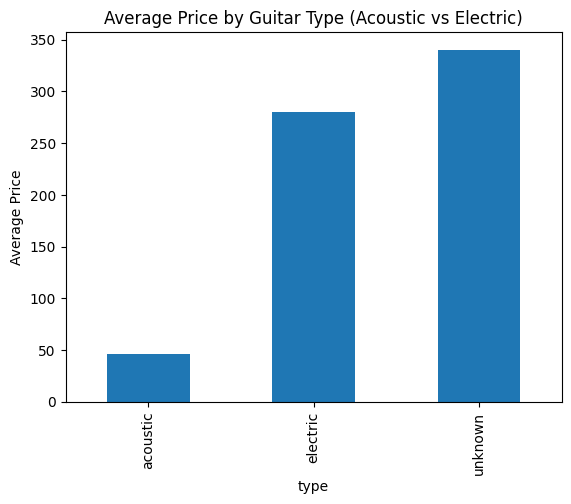

In [39]:
# Price by type (Acoustic vs Electric)
df.groupby('type')['price'].mean().plot(kind='bar')
plt.title('Average Price by Guitar Type (Acoustic vs Electric)')
plt.ylabel('Average Price')
plt.show()

A trend that I have found in the data set is that most guitars that are on Craigslist sell for under 100 dollars, which would make sense since 
used instruments tend to cost a lot less than that of retail price. Fender's tended to cost the most on average than any other brand, and of the acoustic and electric guitars we do have, it seems that used electrics on average cost significantly more. Fender from what I know is a popular brand for electric guitars. It could be cool to see what I could do with the unknowns, maybe try some basic machine learning to try to identify whether each instance of an unknown would be an acoustic or electric guitar.